In [1]:
# Tensorflow example
# Much of this code is adapted from the Manning liveProject 
#     "Monitoring Changes in Surface Water Using Satellite Image Data"

# Imports and global settings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

In [3]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [4]:
tf.config.list_physical_devices('GPU')   # good to know; may need to select -cpu options
                                         # empty list [] means no GPU

[]

In [5]:
from tensorflow.python.keras.layers import Dense, Flatten, Dropout, BatchNormalization

# Read or select data

In [6]:
# Trial run with a classic data set -- handwritten numbers
mnist = tf.keras.datasets.mnist  # these are the number images

# these can be loaded directly into train and test - note that this is NOT the same order as train_test_split()
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
# I've seen these images rescaled so that they are 0 to 1 instead of 0 to 255; not sure if/why we need this
# x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
# print some info about this classic data set
print("{} train examples, {} test examples".format(X_train.shape[0],X_test.shape[0]))
print("Image shapes are {}".format(X_train[0].shape))   # get the shape of the first image in the train set

60000 train examples, 10000 test examples
Image shapes are (28, 28)


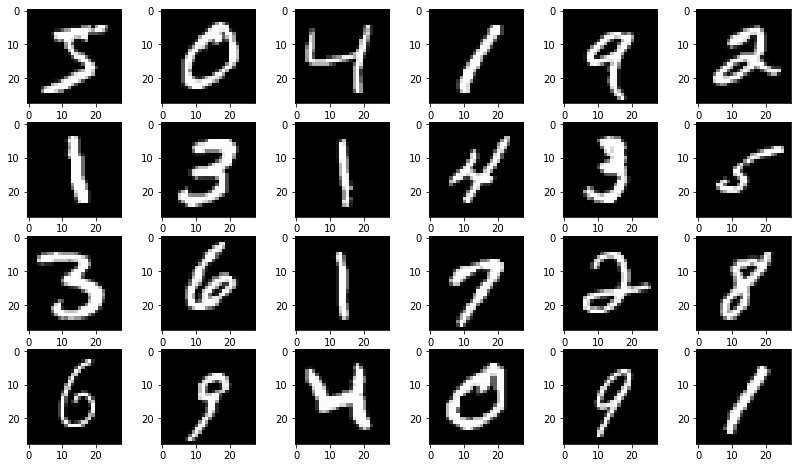

In [9]:
# Look at some of the images in the set
fig = plt.figure(figsize=(14,8))

# plan 24 images
ax_list = []
for i in range(24):
    ax = fig.add_subplot(4,6,i+1)
    ax.imshow(X_train[i],cmap='gray')
    ax_list.append(ax)

# Create a simple neural network

In [10]:
# Very simple example -- we can expand on this

# Instantiating this kind of model has more steps; you kind of build yourself a sandwich instead of
#    passing hyperparameters
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))     # single hidden layer, 'rectified linear unit' or relu
model.add(Dropout(0.2))                            # drop 20% of neurons, selected randomly
model.add(Dense(units=10, activation='softmax'))   # softmax - it's like the logistic regression that decides
                # the answer -- this is the piece that does the final classification into 1 of 10 classes
                # the 10 classes are, of course: 0 1 2 3 4 5 6 7 8 9
                # see https://towardsdatascience.com/softmax-function-simplified-714068bf8156

In [11]:
# Like all the models we've used, you can find out some stuff about it
model.summary()   # what's in it -- for keras/tf, this means the layers
model.layers
model.inputs
model.outputs

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


[<tf.Tensor 'dense_1/Identity:0' shape=(None, 10) dtype=float32>]

In [12]:
# Keras/TF model needs to be compiled -- this is more like the hyperparameters we're used to, I think
model.compile(optimizer='adam', # this will do gradient descent to solve; there might be other options
             loss = 'sparse_categorical_crossentropy', # this is our loss function, categorical problem
                                                       # this probably also has other options
             metrics=['accuracy']  # you can tell it to do other metrics; they aren't used during training
                                   # like the loss function is, but it'll compute stuff for you
             )

In [13]:
# Train the model
model.fit(X_train, y_train, epochs=5)

# these models have to give a go several times; it'll get better if you give it more epochs, but 
#  it will also take longer. If you go crazy with epochs on a big data set, this can run for days.

Epoch 1/5
1875/1875 [==============================] - 1s 771us/step - loss: 2.4710 - accuracy: 0.7592
Epoch 2/5
1875/1875 [==============================] - 1s 765us/step - loss: 0.5979 - accuracy: 0.8493
Epoch 3/5
1875/1875 [==============================] - 1s 759us/step - loss: 0.4725 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 1s 758us/step - loss: 0.4229 - accuracy: 0.8895
Epoch 5/5
1875/1875 [==============================] - 1s 777us/step - loss: 0.3994 - accuracy: 0.8955


In [14]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=1)
# accuracy for me after 5 epochs as 0.9345

313/313 [==============================] - 0s 624us/step - loss: 0.2786 - accuracy: 0.9375


[0.2786064147949219, 0.9375]

In [15]:
# Get predictions so we can look at the confusion matrix
y_pred = model.predict(X_test)
y_pred

array([[0.00000000e+00, 0.00000000e+00, 6.50387671e-30, ...,
        1.00000000e+00, 0.00000000e+00, 1.34921223e-18],
       [3.11635384e-09, 3.17258952e-07, 9.99999166e-01, ...,
        7.04195938e-11, 3.55817353e-09, 4.04767821e-29],
       [0.00000000e+00, 9.99997497e-01, 5.19113615e-12, ...,
        2.44486932e-06, 5.90430149e-09, 2.11593015e-14],
       ...,
       [6.86434495e-24, 2.20337713e-18, 9.06335254e-21, ...,
        2.07522523e-11, 1.23861865e-14, 5.78846198e-07],
       [1.90156312e-32, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.22314006e-29, 0.00000000e+00],
       [2.01403279e-13, 1.29115598e-17, 1.30058819e-09, ...,
        8.39111039e-18, 2.79908357e-17, 5.83299293e-31]], dtype=float32)

In [16]:
# Need to conver the y_pred to run the confusion matrix, but I don't know why yet...
y_pred_convert = tf.argmax(y_pred, axis=1)
y_pred_convert

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>

In [19]:
# Compute confusion matrix
cm_array = confusion_matrix(y_test,y_pred_convert)
# large numbers on the diagonal are good; any numbers not on the diagonal are bad predictions
cm_array

array([[ 953,    0,    1,    1,    1,    1,    7,    3,   11,    2],
       [   0, 1114,    4,    4,    0,    1,    1,    1,   10,    0],
       [  11,    2,  959,   17,    7,    0,    4,    5,   25,    2],
       [   1,    0,   18,  950,    0,    1,    1,    7,   29,    3],
       [   1,    4,    7,    0,  877,    1,    6,    1,    6,   79],
       [   4,    0,    1,   56,    1,  773,    4,    1,   43,    9],
       [  17,    4,    3,    0,    0,   20,  896,    0,   18,    0],
       [   2,    6,   15,   13,    1,    1,    0,  955,    5,   30],
       [   4,    3,    5,    3,    5,    5,    3,    3,  932,   11],
       [   8,    7,    0,    4,    6,    2,    0,    5,   11,  966]])

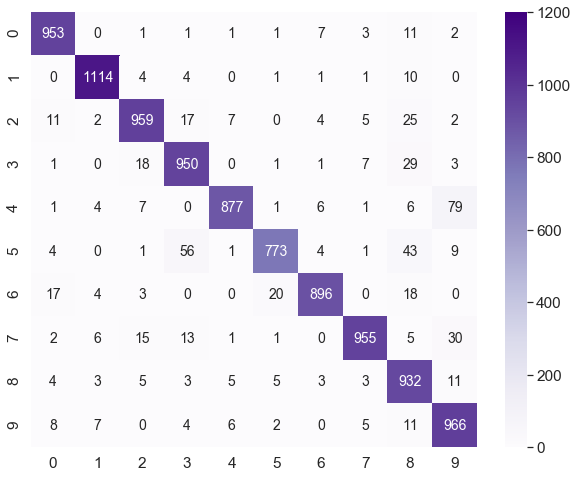

In [22]:
df = pd.DataFrame(cm_array, range(10), range(10))
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df, cmap = 'Purples', annot=True, vmax = 1200, fmt="d", annot_kws={"size": 14}) # font size